In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
df=pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fe

In [6]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df.shape

(6335, 4)

In [8]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
data=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['text'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    data.append(review)

In [13]:
x=df['text']
y=df['label']


In [24]:
cv= CountVectorizer()
X=cv.fit_transform(data)

In [27]:
cv.get_feature_names()[:10]

['aa',
 'aaa',
 'aaahhh',
 'aab',
 'aachen',
 'aadhar',
 'aadmi',
 'aae',
 'aaeeb',
 'aah']

In [28]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
xtrain, xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2)
model=MultinomialNB()
model.fit(xtrain,ytrain)


MultinomialNB()

In [26]:
model.score(xtest,ytest)

0.9013417521704814

In [30]:
pred=model.predict(xtest)
print(pred)

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'FAKE']


In [33]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix 
score=metrics.accuracy_score(ytest,pred)
print(score)

0.9013417521704814


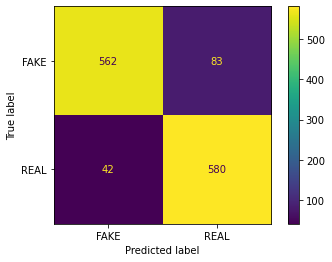

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(ytest,pred)
cnf=ConfusionMatrixDisplay(cm, display_labels=['FAKE','REAL'])
cnf.plot()
plt.show()

In [38]:
news="Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam"
data=cv.transform([news]).toarray()
model.predict(data)

array(['FAKE'], dtype='<U4')